In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
laptop = pd.read_csv('data/laptop_price.csv', encoding= 'latin-1')

In [3]:
laptop = laptop.drop(columns= 'laptop_ID')

In [4]:
laptop.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
laptop['Weight'] = laptop['Weight'].str.split('k').str[0].astype(float)

In [6]:
laptop['Ram'] = laptop['Ram'].str.split('G').str[0].astype(float)

In [7]:
laptop['Memory'] = laptop['Memory'].str.replace('T','024G').str.split('G').str[0].astype(float)

In [8]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [9]:
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [10]:
laptop['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [11]:
laptop['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [12]:
# 노트북이 가벼운 순으로 정렬
laptop.sort_values('Weight', ascending= True)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1082,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,646.27
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,319.00
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,479.00
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,549.00
746,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16.0,256.0,Intel HD Graphics 620,Windows 10,0.81,1649.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16.0,256.0,Nvidia GeForce GTX 980M,Windows 10,4.60,2749.99
1081,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32.0,512.0,Nvidia GeForce GTX 980M,Windows 10,4.60,3240.00
577,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32.0,256.0,Nvidia GeForce GTX 1070,Windows 10,4.60,2663.00
1048,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,128.0,Nvidia GeForce GTX 980M,Windows 10,4.60,2289.99


In [13]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [14]:
laptop.groupby('Company')['Weight'].mean().sort_values(ascending= True).to_frame()

,Weight
Company,
LG,1.050000
Huawei,1.050000
Google,1.100000
Microsoft,1.251333
Samsung,1.315556
Apple,1.320476
Vero,1.330000
Mediacom,1.337143
Xiaomi,1.620000


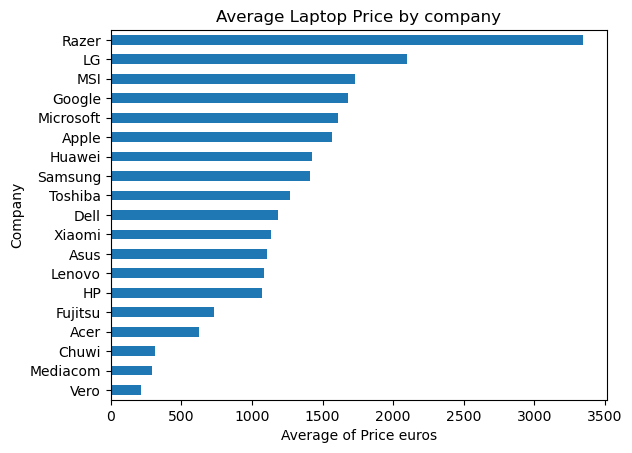

In [15]:
# 노트북 평균 값을 바차트로 나타냄
laptop.groupby('Company')['Price_euros'].mean().sort_values().plot(kind= 'barh')
plt.title('Average Laptop Price by company')
plt.xlabel('Average of Price euros')
plt.show()

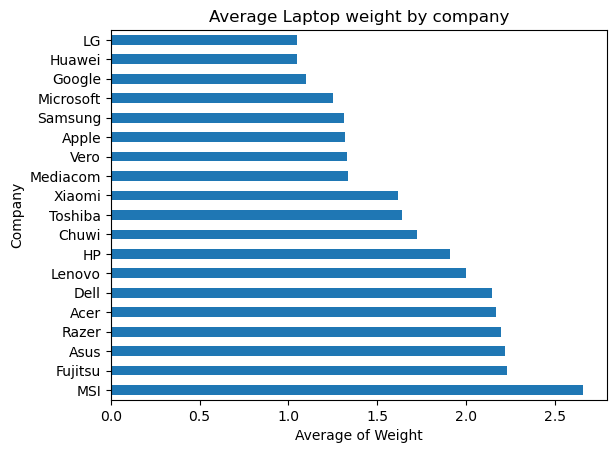

In [16]:
# 회사별 노트북 평균 무게를 바차트로 나타냄
laptop.groupby('Company')['Weight'].mean().sort_values(ascending= False).plot(kind= 'barh')
plt.title('Average Laptop weight by company')
plt.xlabel('Average of Weight')
plt.show()

In [17]:
laptop[['Weight', 'Price_euros']].describe()

,Weight,Price_euros
count,1303.000000,1303.000000
mean,2.038734,1123.686992
std,0.665475,699.009043
min,0.690000,174.000000
25%,1.500000,599.000000
50%,2.040000,977.000000
75%,2.300000,1487.880000
max,4.700000,6099.000000


In [18]:
# 가장 비싼 컴퓨터?
laptop[laptop['Price_euros'] == laptop['Price_euros'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32.0,1024.0,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0


In [19]:
# 가장 저렴한 컴퓨터
laptop[laptop['Price_euros'] == laptop['Price_euros'].min()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2.0,32.0,Intel HD Graphics,Chrome OS,1.3,174.0


In [20]:
# 가장 무게가 가벼운 컴퓨터
laptop[laptop['Weight'] == laptop['Weight'].min()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,319.00
1082,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,646.27
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,549.00
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,479.00


In [21]:
# 가장 무게가 무거운 컴퓨터
laptop[laptop['Weight'] == laptop['Weight'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32.0,512.0,Nvidia GeForce GTX 1080,Windows 10,4.7,3890.0


In [22]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [23]:
# apple 의 제품을 보여줌

In [24]:
apple = laptop[laptop['Company'] == 'Apple']

In [25]:
# 선택한 제품의 inches 선택하면 그 인치의 노트북을 보여줌

In [26]:
inches = apple[apple['Inches'] == 12]

In [27]:
# 선택한 제품의 cpu 를 선택한 그 cpu 의 노트북을 보여줌
inches

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
14,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8.0,256.0,Intel HD Graphics 615,macOS,0.92,1262.4
81,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8.0,512.0,Intel HD Graphics 615,macOS,0.92,1510.0
794,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8.0,512.0,Intel HD Graphics 5300,Mac OS X,0.92,1165.0
1069,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8.0,256.0,Intel HD Graphics 515,Mac OS X,0.92,1300.0
1193,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8.0,256.0,Intel HD Graphics 5300,Mac OS X,0.92,1163.0
1210,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8.0,512.0,Intel HD Graphics 515,Mac OS X,0.92,1279.0


In [28]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [29]:
laptop[['Inches', 'Ram','Weight','Inches','Price_euros']].corr()

,Inches,Ram,Weight,Inches,Price_euros
Inches,1.000000,0.237993,0.827631,1.000000,0.068197
Ram,0.237993,1.000000,0.383874,0.237993,0.743007
Weight,0.827631,0.383874,1.000000,0.827631,0.210370
Inches,1.000000,0.237993,0.827631,1.000000,0.068197
Price_euros,0.068197,0.743007,0.210370,0.068197,1.000000


In [30]:
type_choice_frame = laptop[laptop['TypeName'] == 'Ultrabook']

In [31]:
type_choice['Inches'].unique().astype(str)

NameError: name 'type_choice' is not defined

In [ ]:
inches_choice = type_choice[type_choice_frame['Inches'] == 13.3]

In [ ]:
inches_choice['Ram'].sort_values().unique()

In [ ]:
ram_choice = inches_choice[inches_choice['Ram'] == 8]

In [ ]:
ram_choice['Memory'].sort_values().unique()

In [ ]:
weight_choice = ram_choice[ram_choice['Memory'] == 128]

In [ ]:
weight_choice['Weight'].sort_values().unique()

In [ ]:
weight_choice[weight_choice['Weight'] == 1.21]

In [ ]:
ram_choice['Memory'].sort_values().unique()

In [ ]:
data = laptop.groupby('Inches')['Price_euros'].mean().to_frame().reset_index()

In [ ]:
import seaborn as sb

In [ ]:
sb.regplot(data, x= 'Inches', y= 'Price_euros')
plt.title('Inches and Price_euros Compare')
plt.show()

In [ ]:
sb.pairplot(data, vars=['Inches', 'Price_euros'])
plt.show()

In [ ]:
laptop['Ram'].sort_values(ascending= True).unique()

In [ ]:
laptop['Ram'].unique()

In [32]:
laptop

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128.0,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256.0,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128.0,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512.0,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64.0,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1024.0,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [36]:
laptop_ml = laptop[['Inches','Cpu','Ram','Memory','Weight','Price_euros']]

In [89]:
X = laptop_ml.iloc[:,:4+1]

In [90]:
y = laptop_ml['Price_euros']

In [91]:
X

,Inches,Cpu,Ram,Memory,Weight
0,13.3,Intel Core i5 2.3GHz,8.0,128.0,1.37
1,13.3,Intel Core i5 1.8GHz,8.0,128.0,1.34
2,15.6,Intel Core i5 7200U 2.5GHz,8.0,256.0,1.86
3,15.4,Intel Core i7 2.7GHz,16.0,512.0,1.83
4,13.3,Intel Core i5 3.1GHz,8.0,256.0,1.37
...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4.0,128.0,1.80
1299,13.3,Intel Core i7 6500U 2.5GHz,16.0,512.0,1.30
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2.0,64.0,1.50
1301,15.6,Intel Core i7 6500U 2.5GHz,6.0,1024.0,2.19


In [110]:
X = pd.get_dummies(X, columns = ['Cpu'])

In [111]:
X

,Inches,Ram,Memory,Weight,Cpu_AMD A10-Series 9600P 2.4GHz,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,...,Cpu_Intel Pentium Dual Core 4405U 2.1GHz,Cpu_Intel Pentium Dual Core 4405Y 1.5GHz,Cpu_Intel Pentium Dual Core N4200 1.1GHz,Cpu_Intel Pentium Quad Core N3700 1.6GHz,Cpu_Intel Pentium Quad Core N3710 1.6GHz,Cpu_Intel Pentium Quad Core N4200 1.1GHz,Cpu_Intel Xeon E3-1505M V6 3GHz,Cpu_Intel Xeon E3-1535M v5 2.9GHz,Cpu_Intel Xeon E3-1535M v6 3.1GHz,Cpu_Samsung Cortex A72&A53 2.0GHz
0,13.3,8.0,128.0,1.37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.3,8.0,128.0,1.34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,8.0,256.0,1.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.4,16.0,512.0,1.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.3,8.0,256.0,1.37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,128.0,1.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1299,13.3,16.0,512.0,1.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,14.0,2.0,64.0,1.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301,15.6,6.0,1024.0,2.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [132]:
y_train

951     1775.00
741      665.00
1148    1579.00
491     2799.00
495     1099.00
         ...   
715      857.07
905     2099.00
1096     638.80
235      899.00
1061     998.00
Name: Price_euros, Length: 1042, dtype: float64

In [134]:
y_pred = regressor.predict(X_test)

In [136]:
error = (y_test-y_pred)

In [160]:
(error ** 2).mean()

1.2584160935296317e+23